## The Normal Equation

### The Normal Equation provides a closed-form solution for finding the parameter vector θ that minimizes the Mean Squared Error (MSE) cost function.

### θ = (XᵀX)⁻¹ Xᵀy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating a dummy linear looking data
np.random.seed(42) # ensures we get the same random numbers each time
X = 2 * np.random.rand(100, 1) # 100 random numbers between 0 and 2
# generate y = 4 + 3x + gaussian noise
y = 4 + 3 * X + np.random.rand(100, 1)


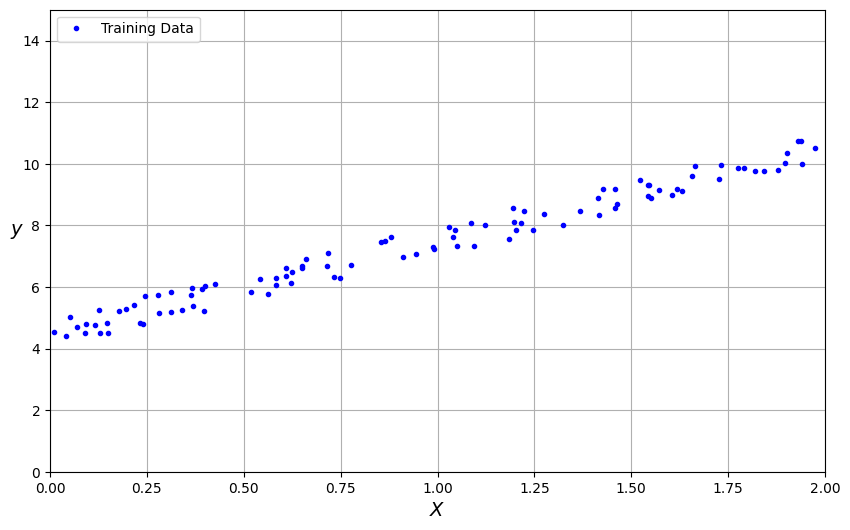

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Training Data")
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend(loc=2)
plt.grid(True)
plt.show()

In [5]:
# prepare the feature matrix X_b
# we need to add x0 = 1 to every instance to account for the bias term θ0
X_b = np.c_[np.ones((100, 1)), X] # X_b is now a 100x2 matrix: [[1, x1], [1, x2], ...]

# applying the normal equation: θ = (XᵀX)⁻¹ Xᵀy
XT_X = X_b.T.dot(X_b)
XT_X_inv = np.linalg.inv(XT_X)
XT_y = X_b.T.dot(y)
theta_best = XT_X_inv.dot(XT_y)

# it should be very close to 4 + 3x
print("Optimal parameters\n", theta_best)

Optimal parameters
 [[4.51359766]
 [2.98323418]]


In [6]:
# make predictions
X_new = np.array([[0], [2]]) # create new instances to predict: x=0 and x=2
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0=1: becomes [[1, 0], [1, 2]]
y_predict = X_new_b.dot(theta_best) # calculate predictions: ŷ = Xθ
print("Predictions for x=0 and x=2\n", y_predict) 

Predictions for x=0 and x=2
 [[ 4.51359766]
 [10.48006601]]


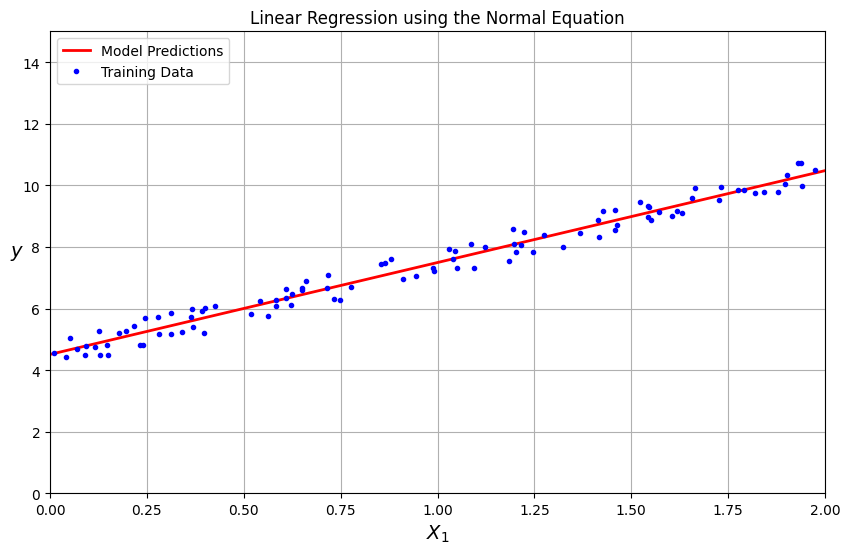

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(X_new, y_predict, "r-", label="Model Predictions", linewidth=2) # red regression line
plt.plot(X, y, "b.", label="Training Data") # blue data points
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend(loc=2)
plt.title("Linear Regression using the Normal Equation")
plt.grid(True)
plt.show()